In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('student_performance_dataset.csv')
df.head()

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student_ID                   10500 non-null  object 
 1   Age                          10500 non-null  int64  
 2   Gender                       10500 non-null  object 
 3   Study_Hours_Per_Week         10500 non-null  int64  
 4   Attendance_Rate              10500 non-null  float64
 5   Assignments_Submitted        10500 non-null  int64  
 6   Course_Grade                 10500 non-null  object 
 7   Part_Time_Job                10500 non-null  object 
 8   Monthly_Income               10500 non-null  int64  
 9   GPA                          10500 non-null  float64
 10  Social_Media_Usage_Hours     10500 non-null  int64  
 11  Extra_Curricular_Activities  10500 non-null  object 
 12  Internet_Access              10500 non-null  object 
 13  Parental_Educati

Student_ID                     0
Age                            0
Gender                         0
Study_Hours_Per_Week           0
Attendance_Rate                0
Assignments_Submitted          0
Course_Grade                   0
Part_Time_Job                  0
Monthly_Income                 0
GPA                            0
Social_Media_Usage_Hours       0
Extra_Curricular_Activities    0
Internet_Access                0
Parental_Education_Level       0
Mode_of_Transport              0
dtype: int64

In [13]:
print(df.columns)
df['Course_Grade'].value_counts()   

Index(['Student_ID', 'Age', 'Gender', 'Study_Hours_Per_Week',
       'Attendance_Rate', 'Assignments_Submitted', 'Course_Grade',
       'Part_Time_Job', 'Monthly_Income', 'GPA', 'Social_Media_Usage_Hours',
       'Extra_Curricular_Activities', 'Internet_Access',
       'Parental_Education_Level', 'Mode_of_Transport'],
      dtype='object')


Course_Grade
D    2151
A    2127
C    2095
F    2070
B    2057
Name: count, dtype: int64

In [50]:
df[['GPA','Study_Hours_Per_Week','Attendance_Rate','Assignments_Submitted','Monthly_Income','Age']].describe()


,GPA,Study_Hours_Per_Week,Attendance_Rate,Assignments_Submitted,Monthly_Income,Age
count,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000
mean,3.002799,21.982952,0.750658,4.477714,10039.761429,21.018095
std,0.577169,10.098496,0.145063,2.887149,5771.402400,1.986538
min,2.000000,5.000000,0.500000,0.000000,3.000000,18.000000
25%,2.500000,13.000000,0.620000,2.000000,5107.000000,19.000000
50%,3.000000,22.000000,0.750000,4.000000,10093.000000,21.000000
75%,3.500000,31.000000,0.880000,7.000000,15085.250000,23.000000
max,4.000000,39.000000,1.000000,9.000000,19998.000000,24.000000


In [17]:
Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1

#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_iqr_cleaned = df[(df['GPA'] >= lower_bound) & (df['GPA'] <= upper_bound)]

print("Original count:", len(df))
print("After IQR cleaning:", len(df_iqr_cleaned))

Original count: 10500
After IQR cleaning: 10500


In [19]:
from scipy import stats

z_scores = stats.zscore(df['GPA'])
abs_z_scores = np.abs(z_scores)

df_z_cleaned = df[abs_z_scores < 3]

print("After Z-score cleaning:", len(df_z_cleaned))

After Z-score cleaning: 10500


In [26]:
# print("IQR method removed:", len(df) - len(df_iqr_cleaned), "rows")
# print("Z-score method removed:", len(df) - len(df_z_cleaned), "rows")

In [54]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 4))
# sns.boxplot(x=df['GPA')
# plt.title('Boxplot Before Cleaning')
# plt.show()


 Z-Score Outlier Detection Summary:
GPA: 0 outliers out of 10500 (0.0%)
Social_Media_Usage_Hours: 0 outliers out of 10500 (0.0%)
Study_Hours_Per_Week: 0 outliers out of 10500 (0.0%)
Monthly_Income: 0 outliers out of 10500 (0.0%)
Age: 0 outliers out of 10500 (0.0%)
Attendance_Rate: 0 outliers out of 10500 (0.0%)


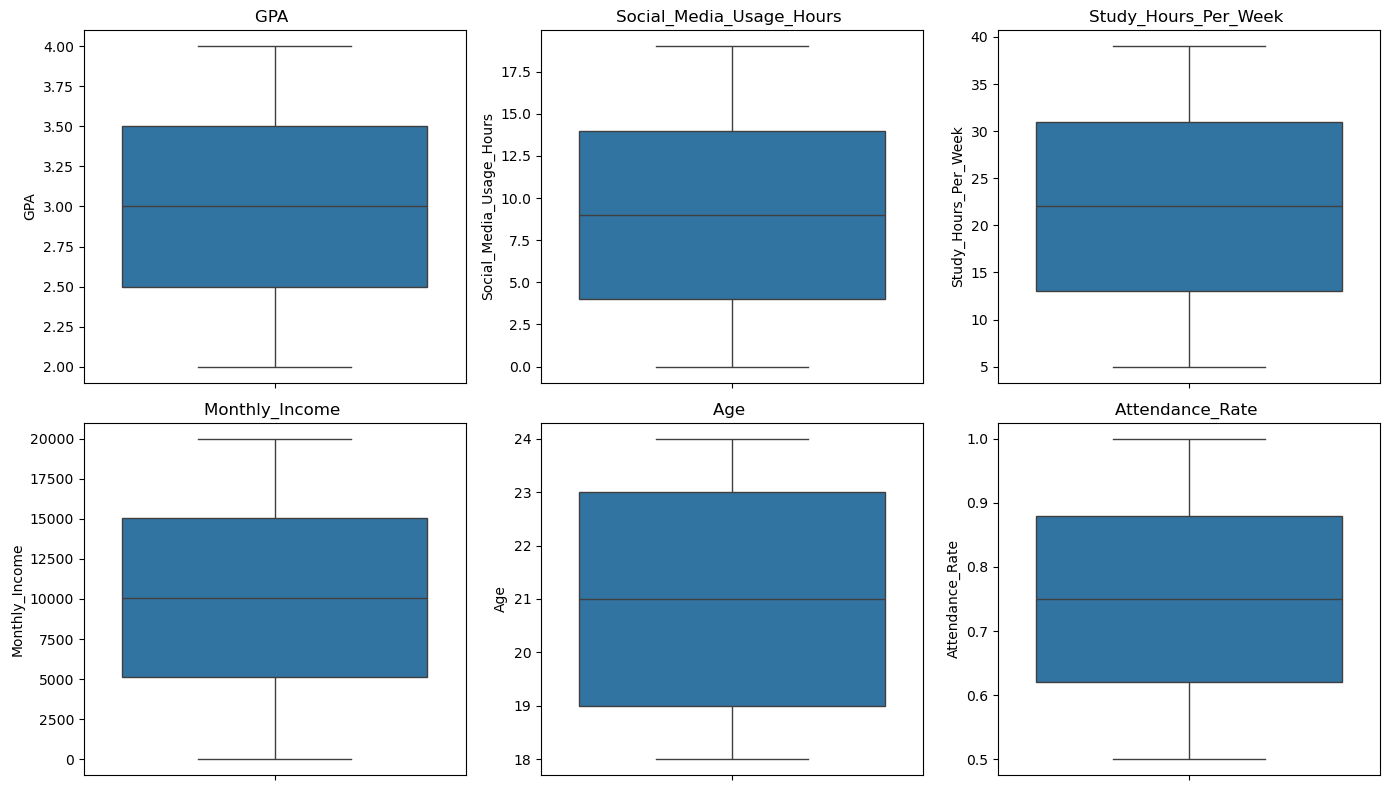

In [88]:
from scipy.stats import zscore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


numerical_cols = ['GPA', 'Social_Media_Usage_Hours', 'Study_Hours_Per_Week', 'Monthly_Income','Age','Attendance_Rate']

z_outlier_summary = {}


threshold = 3

for col in numerical_cols:
    
    col_data = df[col].dropna()
    z_scores = zscore(col_data)
    abs_z = np.abs(z_scores)

    outlier_count = np.sum(abs_z > threshold)

    z_outlier_summary[col] = {
        'outliers': int(outlier_count),
        'total_values': len(col_data),
        'percent_outliers': round((outlier_count / len(col_data)) * 100, 2)
    }

print("\n Z-Score Outlier Detection Summary:")
for col, stats in z_outlier_summary.items():
    print(f"{col}: {stats['outliers']} outliers "
          f"out of {stats['total_values']} "
          f"({stats['percent_outliers']}%)")

# Plot boxplots 
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"{col} ")
plt.tight_layout()
plt.show()

In [68]:
outliers_zscore = {}
for col in numerical_cols:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers = df[z_scores > 3][col]
    outliers_zscore[col] = {'count': len(outliers), 'threshold': 3}
print("Z-score Outliers Summary:", outliers_zscore)

Z-score Outliers Summary: {'GPA': {'count': 0, 'threshold': 3}, 'Social_Media_Usage_Hours': {'count': 0, 'threshold': 3}, 'Study_Hours_Per_Week': {'count': 0, 'threshold': 3}, 'Monthly_Income': {'count': 0, 'threshold': 3}, 'Age': {'count': 0, 'threshold': 3}, 'Attendance_Rate': {'count': 0, 'threshold': 3}, 'Assignments_Submitted': {'count': 0, 'threshold': 3}}


In [70]:
main_df_iqr = df.copy()

for col in numerical_cols:
    Q1 = main_df_iqr[col].quantile(0.25)
    Q3 = main_df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    main_df_iqr[col] = main_df_iqr[col].clip(lower=lower_bound, upper=upper_bound)
print("IQR Capped Summary:\n", main_df_iqr[numerical_cols].describe())

IQR Capped Summary:
                 GPA  Social_Media_Usage_Hours  Study_Hours_Per_Week  \
count  10500.000000              10500.000000          10500.000000   
mean       3.002799                  9.493905             21.982952   
std        0.577169                  5.765248             10.098496   
min        2.000000                  0.000000              5.000000   
25%        2.500000                  4.000000             13.000000   
50%        3.000000                  9.000000             22.000000   
75%        3.500000                 14.000000             31.000000   
max        4.000000                 19.000000             39.000000   

       Monthly_Income           Age  Attendance_Rate  Assignments_Submitted  
count    10500.000000  10500.000000     10500.000000           10500.000000  
mean     10039.761429     21.018095         0.750658               4.477714  
std       5771.402400      1.986538         0.145063               2.887149  
min          3.000000     1

In [72]:
main_df_zscore = df.copy()

for col in numerical_cols:
    mean = main_df_zscore[col].mean()
    std = main_df_zscore[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    main_df_zscore[col] = main_df_zscore[col].clip(lower=lower_bound, upper=upper_bound)
print("Z-score Clipped Summary:\n", main_df_zscore[numerical_cols].describe())

Z-score Clipped Summary:
                 GPA  Social_Media_Usage_Hours  Study_Hours_Per_Week  \
count  10500.000000              10500.000000          10500.000000   
mean       3.002799                  9.493905             21.982952   
std        0.577169                  5.765248             10.098496   
min        2.000000                  0.000000              5.000000   
25%        2.500000                  4.000000             13.000000   
50%        3.000000                  9.000000             22.000000   
75%        3.500000                 14.000000             31.000000   
max        4.000000                 19.000000             39.000000   

       Monthly_Income           Age  Attendance_Rate  Assignments_Submitted  
count    10500.000000  10500.000000     10500.000000           10500.000000  
mean     10039.761429     21.018095         0.750658               4.477714  
std       5771.402400      1.986538         0.145063               2.887149  
min          3.000000 

In [74]:
main_df= main_df_iqr